In [1]:
# This is a pipeline to visualize and analyze the results of CellProfiler on RNAprobe experiments

In [1]:
# Import stuff
import os
from utils import data_reader
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import cv2
from PIL import Image


In [3]:
# Select the path where the data is (the output of CellProfiler)
CPoutput_path = '/mnt/c/Users/herny/Desktop/SWC/Data/Pdym_cell_types/RNAscope/Quantification/2018-05-16/' 

In [4]:
# Import the data
# Name of the output file
nuc_file = 'Nuclei.csv'
# Read it in a useful format
CPdata = data_reader.DataReader(CPoutput_path+nuc_file)

In [5]:
# Check data structure
CPdata.head()

,ObjectNumber,Children_FinalDots_C2_Count,Children_FinalDots_C3_Count
0,1,0,6
1,2,0,26
2,3,7,0
3,4,7,1
4,5,7,11


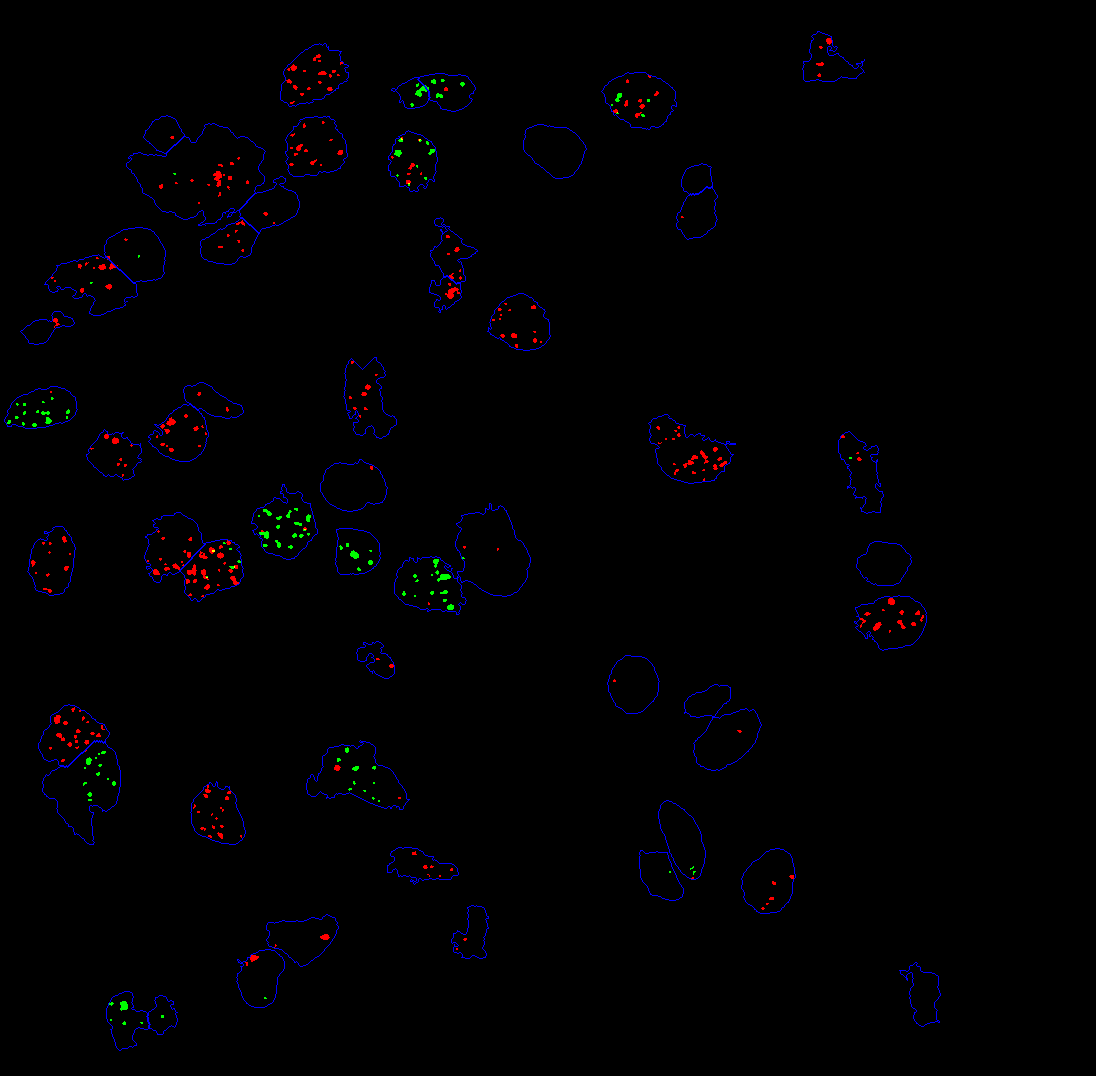

In [11]:
# Look at CellProfiler image output
CPout_image_name = 'ResultOverlay.tiff'
img = Image.open(CPoutput_path+CPout_image_name)
img

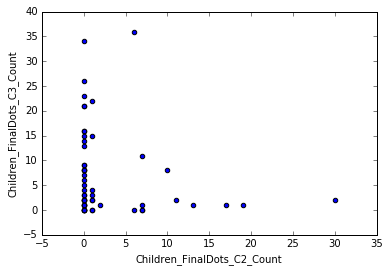

In [8]:
# plot the data
%matplotlib inline
CPdata.plot.scatter(1,2)